In [356]:
#Importing neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as po
import plotly.graph_objs as go

In [295]:
#import pandas-profiling

In [296]:
#Import Customer Churn Dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [297]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [298]:
#Number of rows and cloumns of Dataset
df.shape

(7043, 21)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [300]:
#Convert string values (Yes/No) of Churn column into (1/0)

churn = {'Yes': 1, 'No': 0}
df['Churn'].replace(churn, inplace= True)

In [301]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.65       8
19.9        8
           ..
2586        1
4428.45     1
3005.8      1
6871.7      1
2566.5      1
Name: TotalCharges, Length: 6531, dtype: int64

In [302]:
#Replacing blank value with 'Nan' in 'TotalCharges' column
df['TotalCharges'].replace(' ', np.nan, inplace=True)

In [303]:
df['TotalCharges'].value_counts()

20.2       11
19.75       9
19.65       8
20.05       8
19.9        8
           ..
4428.45     1
3005.8      1
6871.7      1
1663.5      1
2566.5      1
Name: TotalCharges, Length: 6530, dtype: int64

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [305]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [306]:
#Removing null values from 'TotalCharges' column
df = df[df['TotalCharges'].notnull()]

In [307]:
df.shape

(7032, 21)

In [308]:
#Reset the index
df = df.reset_index()[df.columns]

In [309]:
#Convert object datatype into float for 'TotalCharges' column
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [310]:
#Convert 'No internet service' to 'No' for the below columns
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in replace_cols:
    df[i].replace({'No internet service': 'No'}, inplace=True)

In [311]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [312]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [313]:
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [314]:
#Convert 'No phone service' to 'No' for the 'MultipleLines' columns
df['MultipleLines'].replace({'No phone service' : 'No'}, inplace=True)

In [315]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [316]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [317]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [318]:
categorical_features = df[['gender',  'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]

numerical_features = df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]

target = df['Churn']

In [319]:
#categorical_features

In [320]:
for i, cat_features in enumerate(categorical_features):
    print(i , ':' , cat_features)

0 : gender
1 : Partner
2 : Dependents
3 : PhoneService
4 : MultipleLines
5 : InternetService
6 : OnlineSecurity
7 : OnlineBackup
8 : DeviceProtection
9 : TechSupport
10 : StreamingTV
11 : StreamingMovies
12 : Contract
13 : PaperlessBilling
14 : PaymentMethod


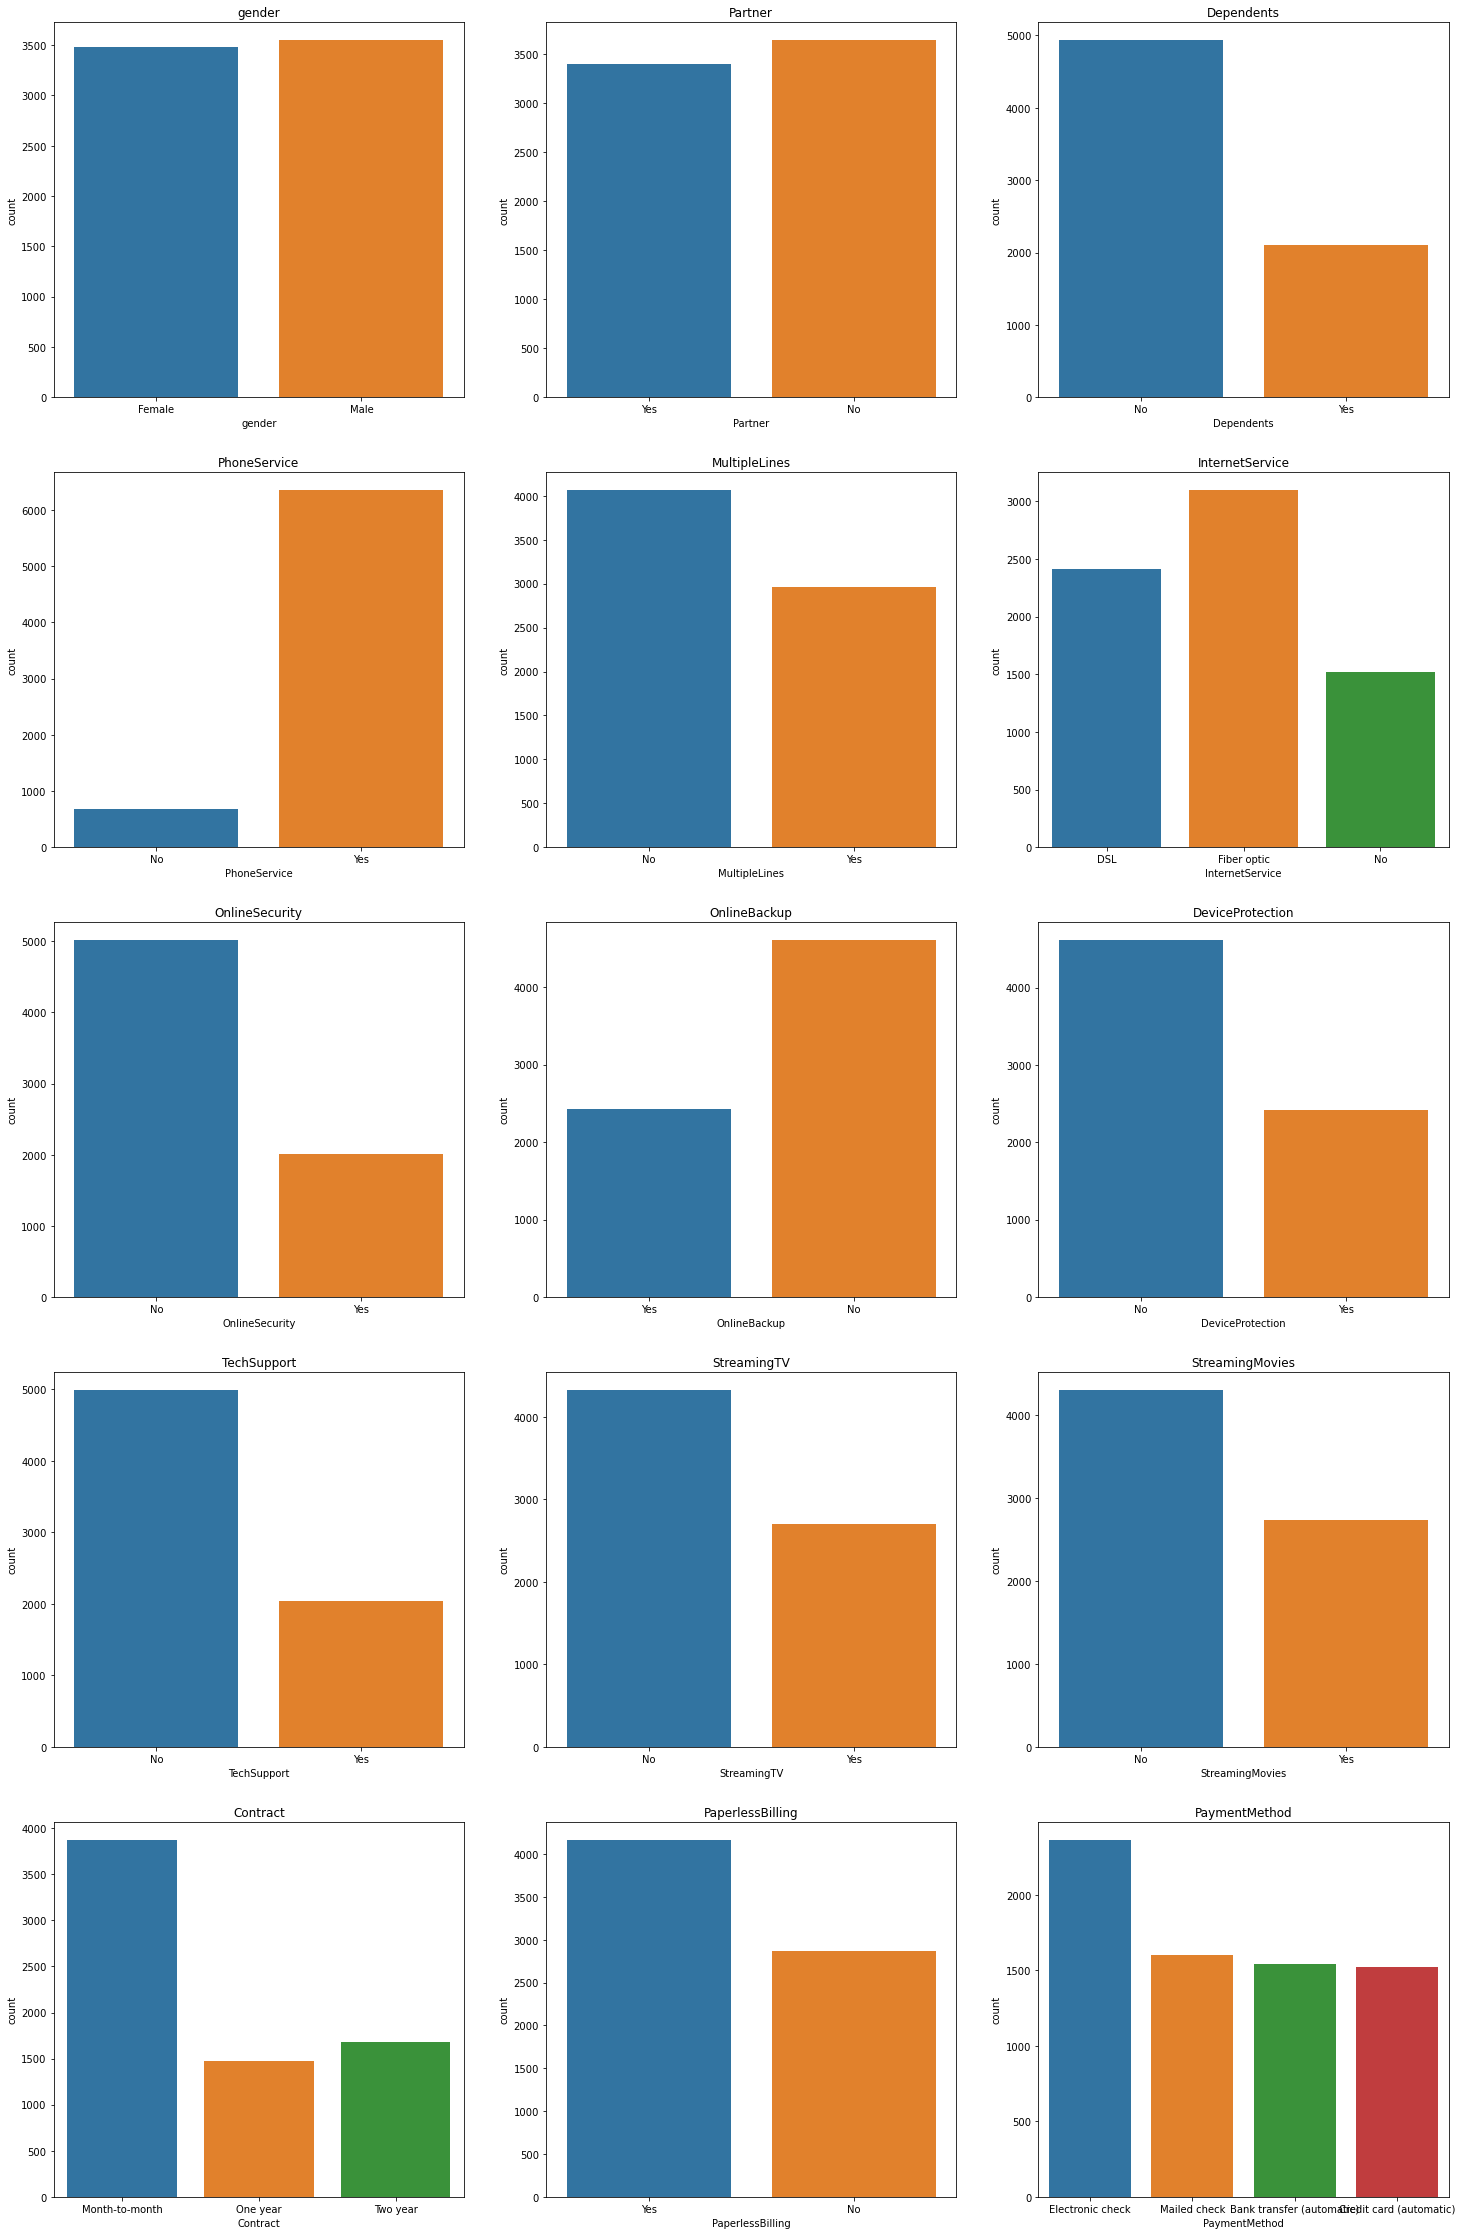

In [321]:
#Visualize each Categorical features by category using Seaborn

Rows, Cols = 5, 3
fig, ax = plt.subplots(Rows, Cols, figsize= (25,40))

row, col = 0, 0

for i, cat_features in enumerate(categorical_features):
    if col == Cols-1:
        row += 1
    col = i % Cols
    #df[cat_features].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(cat_features)
    sns.countplot(x= cat_features, data=df, ax=ax[row, col]).set_title(cat_features)


In [323]:
#sns.catplot(x="gender", col="Churn", data=df, kind="count", height=4, aspect=.7)

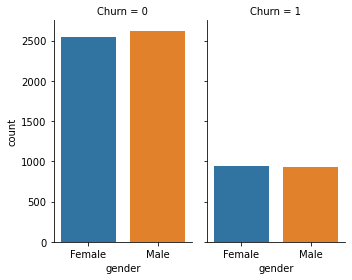

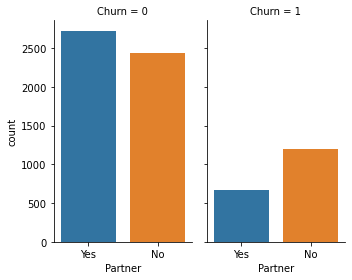

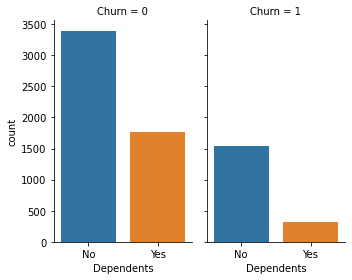

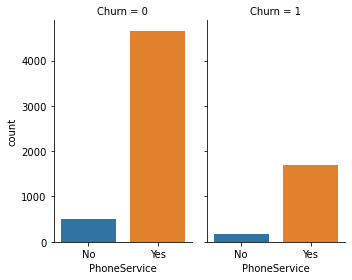

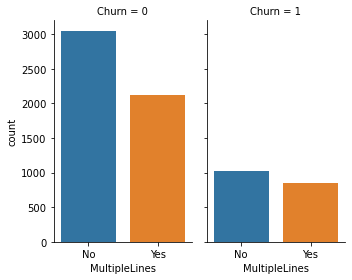

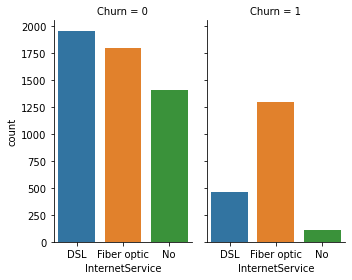

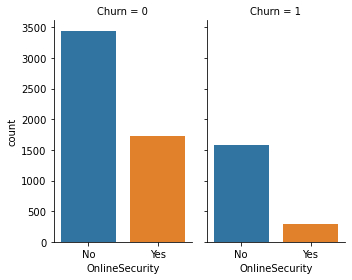

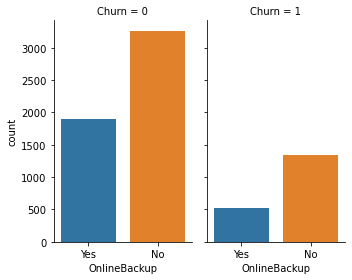

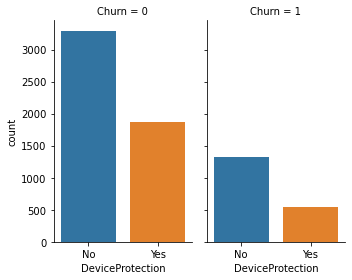

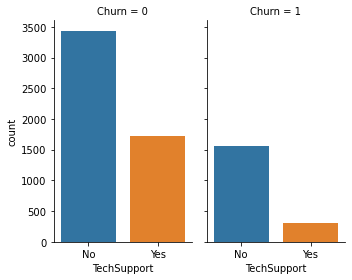

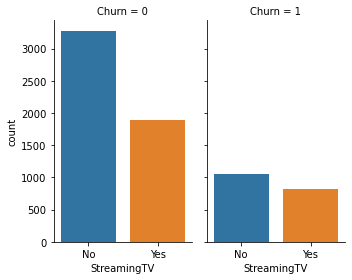

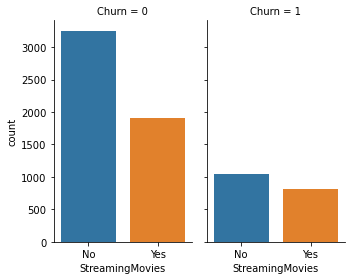

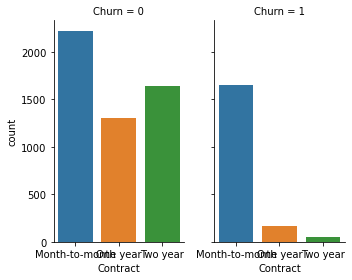

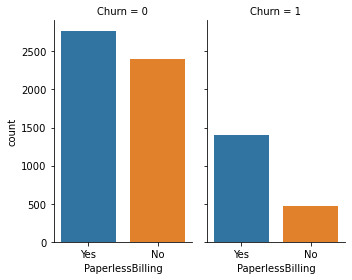

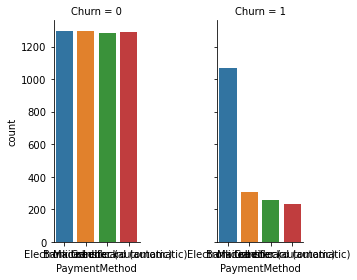

In [324]:
#Visualize Churn rate by Categorical features
for i, cat_features in enumerate(categorical_features):    
    sns.catplot(x=cat_features, col="Churn", data=df, kind="count", height=4, legend=True, aspect=0.6)

In [139]:
#fig, ax = plt.subplots(1, 2, figsize= (10,6))

#df[df.Churn == 1][feature].value_counts().plot(kind= 'bar', ax=ax[0]).set_title('Not churned')
#df[df.Churn == 0][feature].value_counts().plot(kind= 'bar', ax=ax[1]).set_title('Churned')

Text(0.5, 1.0, 'PaymentMethod')

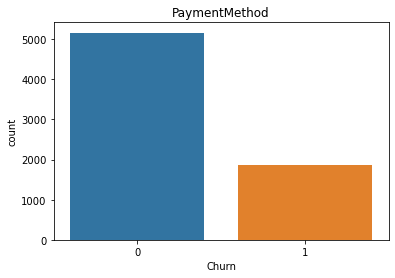

In [325]:
sns.countplot(x= 'Churn', data=df).set_title(cat_features)


In [326]:
churn_labels = df['Churn'].value_counts().keys().tolist()
churn_values = df['Churn'].value_counts().values.tolist()

In [327]:
churn_labels

[0, 1]

In [328]:
churn_values

[5163, 1869]

In [329]:
df1 = df.copy()

In [229]:
#Visualize Total Churn/NoChurn % as a Pie plot

import plotly.express as px
df1 = px.data.tips()
fig = px.pie(df1, values=churn_values, names=churn_labels, color_discrete_sequence=px.colors.sequential.Hot, hole= 0.6)
fig.show()

In [358]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [384]:
plot_by_gender = df1.groupby('gender')['Churn'].sum().reset_index()

plot_data = [go.Bar(x= plot_by_gender['gender'], y=plot_by_gender['Churn'],
                    width=[0.3, 0.3], marker=dict(color= ['orange', 'green']))]
plot_layout = go.Layout(yaxis= {"title": "Churn Rate"},title= 'Churn rate by Gender')
fig = go.Figure(data= plot_data, layout=plot_layout)
po.iplot(fig)

<Figure size 43200x28800 with 0 Axes>

In [394]:
#Visualize Churn rate by Categorical features using plotly

categorical_features = df1[['gender',  'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]

for i, cat_features in enumerate(categorical_features):
    plot = df1.groupby(cat_features)['Churn'].sum().reset_index()
    plot_data = [go.Bar(x= plot[cat_features], y=plot['Churn'],
                    width=[0.3, 0.3, 0.3, 0.3], marker=dict(color= ['blue','green', 'red', 'orange']))]
    plot_layout = go.Layout(yaxis= {"title": "Churn Rate"},title= ('Churn Rate by '+cat_features))
    fig = go.Figure(data= plot_data, layout=plot_layout)
    po.iplot(fig)

In [331]:
df.drop('customerID', axis=1, inplace=True)

In [332]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [333]:
#Performing OneHotEncoding using get_dummies method

df = pd.get_dummies(data=df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
                                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                     'Contract', 'PaperlessBilling', 'PaymentMethod', 'InternetService'], drop_first=True)

In [334]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,1,29.85,29.85,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,45,42.30,1840.75,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0


In [335]:
#Importing StandardScaler library and creating an object of this
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [336]:
#Perform feature scaling on 'tenure', 'MonthlyCharges', 'TotalCharges' in order to bring them in same scale
cols_for_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[cols_for_scaling]= ss.fit_transform(df[cols_for_scaling])

In [337]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,-1.280248,-1.161694,-0.994194,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0.064303,-0.260878,-0.173740,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,0,-1.239504,-0.363923,-0.959649,1,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0.512486,-0.747850,-0.195248,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,-1.239504,0.196178,-0.940457,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0


In [338]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

In [339]:
#Create Feature variable 'X' and Target variable 'y'

X= df.drop('Churn', axis=1)
y= df['Churn']

In [340]:
#Split the data into Training and Testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [341]:
#Importing various Machine learing classification model libraries

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [342]:
#Importing various metrics libraries to evaluate the accuracy of models

from sklearn.metrics import confusion_matrix, accuracy_score

## Fit the Logistic Regression

In [343]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#Predict the values
y_pred = log_reg.predict(X_test)

#Find Confusion_matrix and Accuracy_score
cm_logistic = confusion_matrix(y_test, y_pred)
print('Logistic regression: \n', cm_logistic, '\n')

accuracy_logistic = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy score on Logistic regression: ', accuracy_logistic, '%')

Logistic regression: 
 [[1377  165]
 [ 266  302]] 

Accuracy score on Logistic regression:  79.57 %


c:\users\dinesh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



## Fit the K-NearestNeighbor classifier

Text(0, 0.5, 'Error Rate')

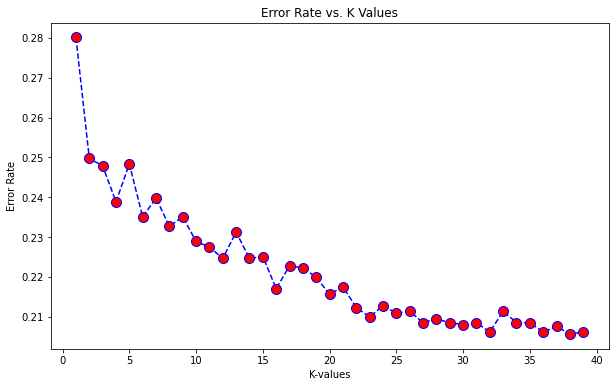

In [344]:
#Choosing K-value

err_rate = []
for i in range(1, 40):
    knn_classifier = KNeighborsClassifier(n_neighbors= i)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    err_rate.append(np.mean(y_pred != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Values')
plt.xlabel('K-values')
plt.ylabel('Error Rate')

In [345]:
#Fit the K-Nearest model with 8 neighbors

knn_classifier = KNeighborsClassifier(n_neighbors= 8)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)


#Find Confusion_matrix and Accuracy_score
cm_knn = confusion_matrix(y_test, y_pred)
print('K-Nearest classifier: \n', cm_knn, '\n')

accuracy_knn = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy score on K-Nearest classifier: ', accuracy_knn, '%')

K-Nearest classifier: 
 [[1377  165]
 [ 326  242]] 

Accuracy score on K-Nearest classifier:  76.73 %


## Fit the Support Vector Machine model

In [346]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

#Find Confusion_matrix and Accuracy_score
cm_svm = confusion_matrix(y_test, y_pred)
print('SVM: \n', cm_svm, '\n')

accuracy_svm = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy score on SVM: ', accuracy_svm, '%')

SVM: 
 [[1377  165]
 [ 274  294]] 

Accuracy score on SVM:  79.19 %


## Fit the Decision Tree classification model

In [347]:
decision_tree = DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

#Find Confusion_matrix and Accuracy_score
cm_decision_tree = confusion_matrix(y_test, y_pred)
print('Decision Tree: \n', cm_decision_tree, '\n')

accuracy_decision_tree = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy score on Decision Tree: ', accuracy_decision_tree, '%')

Decision Tree: 
 [[1253  289]
 [ 274  294]] 

Accuracy score on Decision Tree:  73.32 %


## Fit the Randon Forest classification model

In [348]:
random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy')
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

#Find Confusion_matrix and Accuracy_score
cm_random_forest = confusion_matrix(y_test, y_pred)
print('Random Forest: \n', cm_random_forest, '\n')

accuracy_random_forest = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy score on Random Forest: ', accuracy_random_forest, '%')

Random Forest: 
 [[1402  140]
 [ 298  270]] 

Accuracy score on Random Forest:  79.24 %


## Comparing all the models accuracy

In [349]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbor', 'Support Vector Machine', 
                                 'Decision Tree', 'Random Forest'],
                      'Score': [accuracy_logistic, accuracy_knn, accuracy_svm, accuracy_decision_tree, accuracy_random_forest]})

In [350]:
models

,Model,Score
0,Logistic Regression,79.57
1,K-Nearest Neighbor,76.73
2,Support Vector Machine,79.19
3,Decision Tree,73.32
4,Random Forest,79.24
